In [1]:
from pynq.overlays.base import BaseOverlay
import time
from datetime import datetime
base = BaseOverlay("base.bit")

In [3]:
%%microblaze base.PMODA

#include "gpio.h"
#include "pyprintf.h"

//Function to turn on/off a selected pin of PMODA
unsigned int write_gpio(unsigned int pin, unsigned int val){
    if (pin > 3 || pin < 1)
    {
        pyprintf("ERROR: invalid pin");
        return 0;
    }
    if (val > 1)
    {
        pyprintf("ERROR: invalid value");
    }
    gpio pin_out = gpio_open(pin);
    gpio_set_direction(pin_out, GPIO_OUT);
    gpio_write(pin_out, val);
    return 0;
}

//Function to read the value of a selected pin of PMODA
unsigned int read_gpio(unsigned int pin){
    gpio pin_in = gpio_open(pin);
    gpio_set_direction(pin_in, GPIO_IN);
    return gpio_read(pin_in);
}

//Function to reset all GPIO on PMODA
unsigned int reset_all_gpio()
{
    for (unsigned int i=0; i <= 7; i++)
    {
        gpio temp_gpio = gpio_open(i);
        gpio_close(temp_gpio);
    }
    return 0;
}

In [24]:
from pynq.lib import Pmod_PWM

data=[]
# pwm = Pmod_PWM(base.PMODB,1)

# pwm.generate(50000,50)

time.sleep(1)

for i in range(20):
    write_gpio(2,1)
    for i in range(3):
        data.append(read_gpio(1))
        time.sleep(0.01)
    write_gpio(2,0)
    for i in range(3):
        data.append(read_gpio(1))
        time.sleep(0.01)

# pwm.stop()

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]


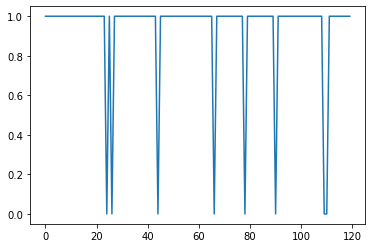

In [25]:
import matplotlib.pyplot as plt

plt.plot(data)
print(data)